- **@author**: run_walker
- **@references**:f
    1. [mlxtend.plotting.scatterplotmatrix](http://rasbt.github.io/mlxtend/user_guide/plotting/scatterplotmatrix/)

- `mlxtend.plotting.scatterplotmatrix`
- `seaborn.pairplot`

对比两者，`mlxtend`中只绘制下三角阵的图；但`seaborn`中的实现使用起来更便捷，尤其是同时展示多类别的情景；`seaborn`的功能也更全面，对角线上可以通过参数`diag_kind`选择绘制直方图（`hist`）或者密度图（`kde`），非对角线位置可以通过参数`kind`选择绘制散点图（`scatter`）或者带线性回归结果的散点图（`reg`）。

In [1]:
from mlxtend.plotting import scatterplotmatrix

?scatterplotmatrix

Signature:
scatterplotmatrix(
    X,
    fig_axes=None,
    names=None,
    figsize=(8, 8),
    alpha=1.0,
    **kwargs,
)
Docstring:
Lower triangular of a scatterplot matrix

Parameters
-----------
X : array-like, shape={num_examples, num_features}
  Design matrix containing data instances (examples)
  with multiple exploratory variables (features).

fix_axes : tuple (default: None)
  A `(fig, axes)` tuple, where fig is an figure object
  and axes is an axes object created via matplotlib,
  for example, by calling the pyplot `subplot` function
  `fig, axes = plt.subplots(...)`

names : list (default: None)
  A list of string names, which should have the same number
  of elements as there are features (columns) in `X`.

figsize : tuple (default: (8, 8))
  Height and width of the subplot grid. Ignored if
  fig_axes is not `None`.

alpha : float (default: 1.0)
  Transparency for both the scatter plots and the
  histograms along the diagonal.

**kwargs : kwargs
  Keyword arguments for the

In [2]:
import seaborn as sns

?sns.pairplot

Signature:
sns.pairplot(
    data,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    dropna=True,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each
variable in ``data`` will by shared in the y-axis across a single row and
in the x-axis across a single column. The diagonal Axes are treated
differently, drawing a plot to show the univariate distribution of the data
for the variable in that column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you need more flexibility.

Parameters
------

# Example1 Simple Scatter Plot Matrix

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target
cols = iris.feature_names
X_df = pd.DataFrame(X, columns=cols)

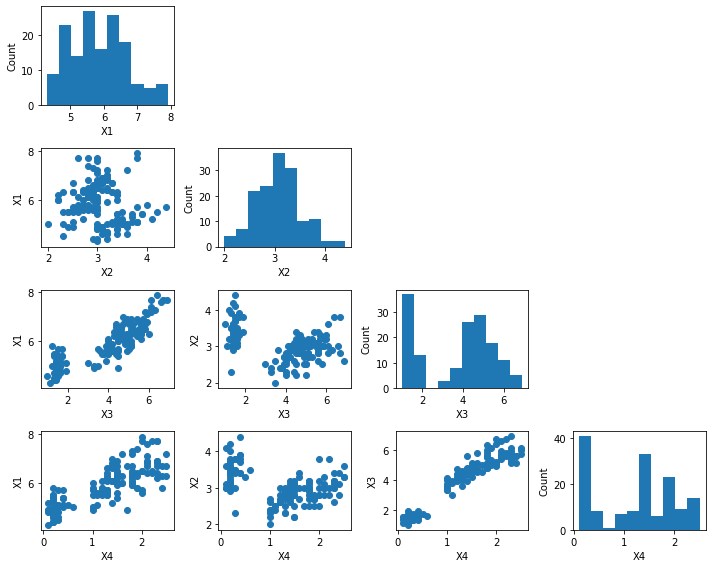

In [5]:
from mlxtend.plotting import scatterplotmatrix
import matplotlib.pyplot as plt

scatterplotmatrix(X, figsize=(10, 8))
plt.tight_layout();  # Automatically adjust subplot parameters to give specified padding.

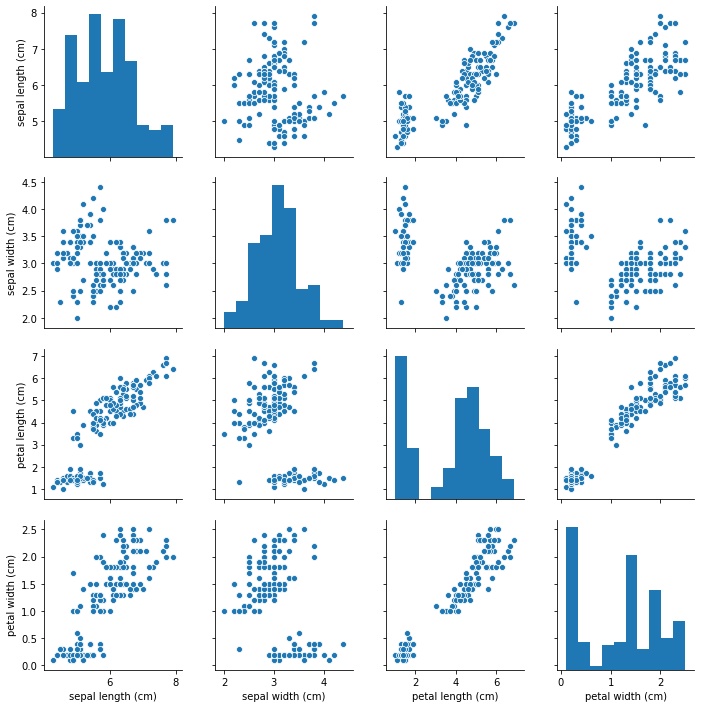

In [6]:
import seaborn as sns

sns.pairplot(X_df);

# Example2 Scatter Plot Matrix with Multiple Categories

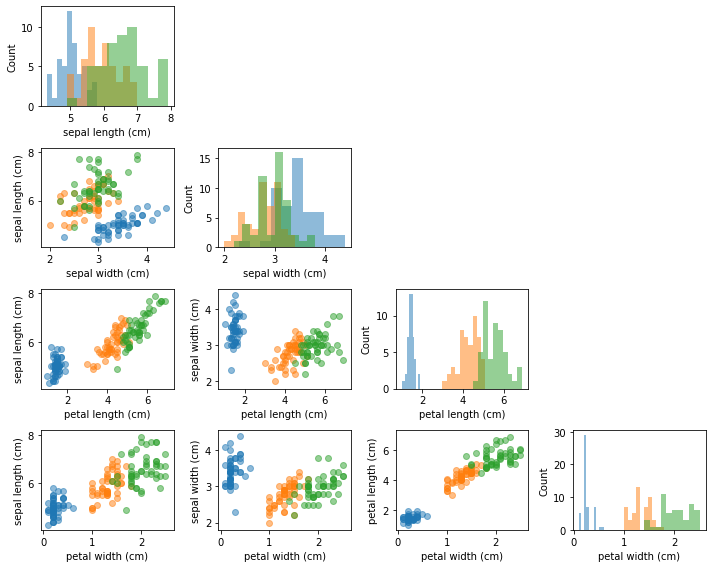

In [8]:
# 注意：不能省去等号左边的返回值赋值，否则会报错
fig, axes = scatterplotmatrix(X[y==0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y==2], fig_axes=(fig, axes), alpha=0.5, names=cols)

plt.tight_layout();

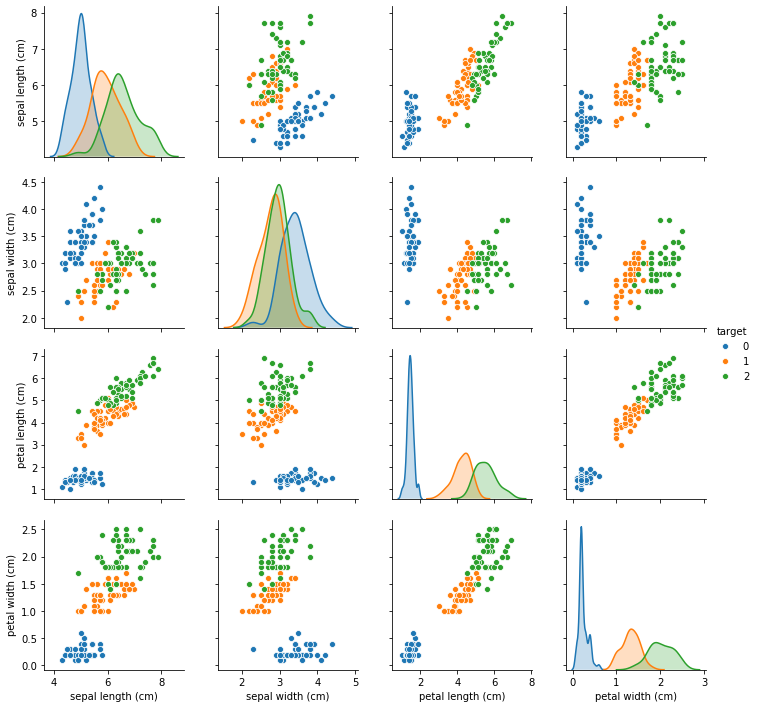

In [11]:
X_df['target'] = y
sns.pairplot(X_df, vars=cols, hue='target');

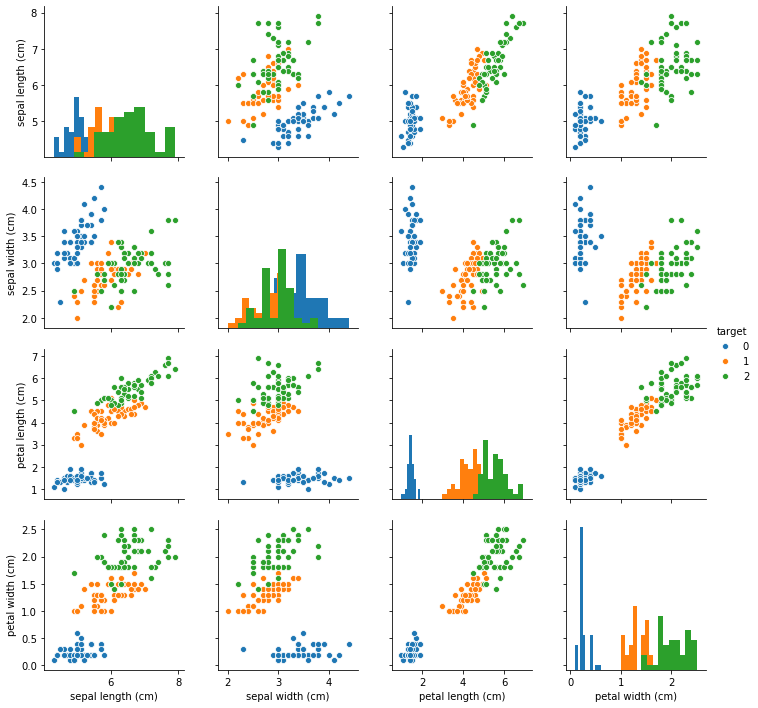

In [13]:
sns.pairplot(X_df, vars=cols, hue='target', diag_kind='hist');

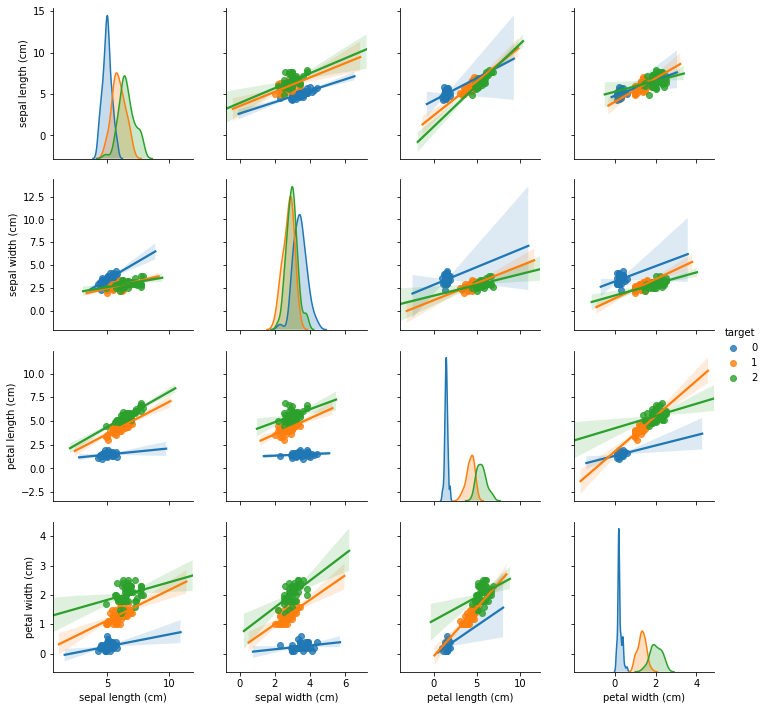

In [14]:
sns.pairplot(X_df, vars=cols, hue='target', kind='reg');